**Helpful Material:**

1) https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

2) Helpful function: df.value_counts()

**Learning objective**
*  EDA
*  Getting familiar with datetime operations


In [2]:
# Loading Libraries
import numpy as np
import pandas as pd


# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load data
chicago_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Chicago_Crime_Detective.csv")

Use the raw data github link above.

Data Columns details:
1. ID: a unique identifier for each observation.

2. Date: the date the crime occurred.
LocationDescription: the location where the crime occurred.

3. Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made).

4. Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic).

5. Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.

6. District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.

7. CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

8. Year: the year in which the crime occurred.
Latitude: the latitude of the location at which the crime occurred.

**Question 1:** What is the Month and Year of the median date in our dataset? *

Enter your answer as "Month Year", without the quotes.
1. January 2006
2. March 2006
3. May 2006  
4. June 2006

Ans: May 2006

In [4]:
# Write your code here
chicago_data["Date"] = pd.to_datetime(chicago_data["Date"])
chicago_data["month"] = chicago_data["Date"].dt.month
mdate = (chicago_data.Date[len(chicago_data['Date'])//2])
months = ['','January','February','March','April','May','June','July','August','September','October','November','December']#to adjust index value for later
mmonth = mdate.month
myear = mdate.year
print(months[mmonth],' ',myear) 

May   2006


**Question 2:** In which month did the lowest motor vehicle thefts occur? *

1. January
2. February 
3. March
4. April

Ans: February

In [5]:
# Write your code here
lsmonth = chicago_data.month.value_counts()
print(months[lsmonth.index[-1]])

February


**Question 3:** In which month did the highest motor vehicle thefts occur? *

1. September
2. October
3. November
4. December

Ans: October


In [6]:
# Write your code here
print(months[lsmonth.index[0]])

October


**Question 4:** On which day of the week did most motor vehicle thefts occur? 
1. Monday
2. Wednesday
3. Friday 
4. Sunday

Ans: Friday

In [40]:
# Write your code here
chicago_data["day"] = (chicago_data.Date.dt.dayofweek)
import calendar
days = list(calendar.day_name)
lsday = chicago_data.day.value_counts()
print(lsday)
mostday = lsday.index[0]
print(days[mostday])

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: day, dtype: int64
Friday


**Question 5:** Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? 

1. January  
2. February
3. March
4. April

Ans: Janaury


In [27]:
# Write your code here
arrested = chicago_data[chicago_data.Arrest == True]
amonth = arrested.month.value_counts()
print(months[amonth.index[0]])

January


**Question 6:** Select the incorrect statement 
1. It look like crime decreases from 2002 - 2012
2. It look like crime increases from 2005 - 2008
3. It look like crime increases from 2009 - 2011

Point number 2 because graph says so

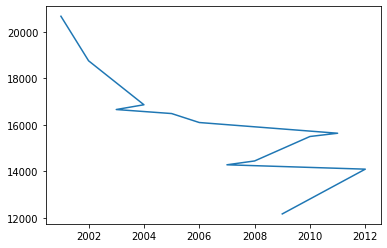

In [45]:
# Write your code here
chicago_data['Year'].value_counts().plot()

**Question 7:** Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? *
(Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)

1. First half
2. Second half

Ans: First Half


In [26]:
# Write your code here
fhalf = chicago_data[chicago_data['Year'] < 2007]
shalf = chicago_data[chicago_data['Year'] >= 2007]
strs = 'First Half' if len(fhalf) > len(shalf) else 'Second Half'
print(strs)

First Half


**Question 8:** For what proportion of motor vehicle thefts in 2001 was an arrest made? *
**Note:** In this question, we are asking for an answer as a proportion. Therefore, your answer should take a value between 0 and 1

1. 0.06
2. 0.08
3. 0.10
4. 0.12

Ans: 0.10


In [ ]:
# Write your code here
a2001 = chicago_data[(chicago_data['Year'] == 2001) & (chicago_data['Arrest'] == True)]
na2001 = chicago_data[(chicago_data['Year'] == 2001)]
print("Proportion of the given condition is : ", round(len(a2001)/len(na2001),2))

**Question 9:** Create a subset of your data, only taking observations for which the theft happened in one of the top five locations for motor vehicle thefts, excluding the "Other" category. Call this new data set "Top5". How many observations are in Top5?

1. 177510 
2. 177515
3. 177520
4. 177525

Ans: 177510


In [24]:
# Write your code here
ls = chicago_data['LocationDescription'].value_counts()
top5loc = list(ls.index[0:6])
top5loc.remove('OTHER')
intopfive = chicago_data[(chicago_data['LocationDescription'].isin(top5loc))]
print(len(intopfive))

177510


**Question 10:** On which day of the week do the most motor vehicle thefts at gas stations happen? *

1. Tuesday
2. Thursday
3. Saturday
4. Sunday

Ans: Saturday

In [35]:
# Write your code here
crimeatgas = chicago_data[chicago_data['LocationDescription'] == 'GAS STATION']
print(days[crimeatgas.day.value_counts().index[0]])

Saturday
